In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("911.csv") #loading the data

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
print("shape of data is:", data.shape)

shape of data is: (423909, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


##### Feature Details:-

- lat: Latitude
- lng: Longitude
- desc: Description of the Emergency Call
- zip:  ZIP Code
- title:  Title of Emergency
- timeStamp: Date and time of the call, YYYY-MM-DD HH:MM:SS
- twp: Township
- addr: General Address
- e: Dummy variable, Index column (always 1)

In [6]:
data.zip.value_counts().head(10)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
19002.0    13380
19468.0    12393
19046.0    11720
19454.0    11457
19090.0    11149
Name: zip, dtype: int64

In [7]:
data.title.value_counts().head(4)

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
Name: title, dtype: int64

#####  Feature 'title' contains details about the type of assistance required and the available mode of emergency help. By analyzing the data, it becomes apparent that the three main types of emergency services are EMS, FIRE, and Traffic. To further enhance the categorization of emergency data, another feature called 'Modality' can be introduced, which would provide information about the mode of emergency help available.

In [8]:
raw1 = data.title.str.split(": ",expand = True)[0] # splitting the feature
raw1.head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: 0, dtype: object

In [9]:
data["Modality"] = raw1 # creating new feature

In [10]:
raw2 = data.title.str.split(": ",expand = True)[1]
data["Accident Type"] = raw2

In [11]:
data["Accident Type"].value_counts().head(10)

VEHICLE ACCIDENT -       98401
DISABLED VEHICLE -       31871
FIRE ALARM               24459
VEHICLE ACCIDENT         24081
FALL VICTIM              21258
RESPIRATORY EMERGENCY    21159
CARDIAC EMERGENCY        20620
ROAD OBSTRUCTION -       14134
SUBJECT IN PAIN          12004
HEAD INJURY              11105
Name: Accident Type, dtype: int64

In [12]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Modality,Accident Type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,NAUSEA/VOMITING
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,RESPIRATORY EMERGENCY
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,SYNCOPAL EPISODE
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT -


In [13]:
data.Modality.value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Modality, dtype: int64

In [17]:
data.timeStamp.info() # It showing the datatype as string. Converting it to DateTime datatype.

<class 'pandas.core.series.Series'>
RangeIndex: 423909 entries, 0 to 423908
Series name: timeStamp
Non-Null Count   Dtype 
--------------   ----- 
423909 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [18]:
data.timeStamp = pd.to_datetime(data.timeStamp) # converted to datetime.

In [19]:
data.timeStamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 423909 entries, 0 to 423908
Series name: timeStamp
Non-Null Count   Dtype         
--------------   -----         
423909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB


In [22]:
data["Date"] = data.timeStamp.dt.date

In [26]:
data["Year"] = data.timeStamp.dt.year
data["Month"] = data.timeStamp.dt.month
data["Day of Week"] = data.timeStamp.dt.dayofweek
data["Hour"] = data.timeStamp.dt.hour
# Extracting year,month,day of week and hours from timeStamp variable.

In [27]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Modality,Accident Type,Date,Year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,2015,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,2015,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,2015,12,3,16


In [29]:
x = {0:"Monday", 1:"Tuesday",2:"Wednesday", 3:"Thursday", 4:"Friday",
    5:"Saturday", 6:"Sunday"}
data["Day of Week"] = data["Day of Week"].map(x)
# assigning weekday names

In [30]:
m = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
    7:"July", 8:"August", 9:"September", 10:"October", 11:"November",
    12:"December"}
data["Month"] = data.Month.map(m)
# assigning month names

In [31]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Modality,Accident Type,Date,Year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,2015,December,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,2015,December,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,2015,December,Thursday,16


In [32]:
data.twp.value_counts().head(10)

LOWER MERION        36441
ABINGTON            25835
NORRISTOWN          23883
UPPER MERION        22694
CHELTENHAM          19629
POTTSTOWN           17500
UPPER MORELAND      14707
LOWER PROVIDENCE    14025
PLYMOUTH            12800
UPPER DUBLIN        11910
Name: twp, dtype: int64

In [33]:
data.twp.nunique()

68

In [34]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Modality,Accident Type,Date,Year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,2015,December,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,2015,December,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,2015,December,Thursday,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY,2015-12-10,2015,December,Thursday,15
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,NAUSEA/VOMITING,2015-12-10,2015,December,Thursday,16
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,RESPIRATORY EMERGENCY,2015-12-10,2015,December,Thursday,16
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,SYNCOPAL EPISODE,2015-12-10,2015,December,Thursday,16
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT -,2015-12-10,2015,December,Thursday,17


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   lat            423909 non-null  float64       
 1   lng            423909 non-null  float64       
 2   desc           423909 non-null  object        
 3   zip            371780 non-null  float64       
 4   title          423909 non-null  object        
 5   timeStamp      423909 non-null  datetime64[ns]
 6   twp            423750 non-null  object        
 7   addr           423909 non-null  object        
 8   e              423909 non-null  int64         
 9   Modality       423909 non-null  object        
 10  Accident Type  423909 non-null  object        
 11  Date           423909 non-null  object        
 12  Year           423909 non-null  int64         
 13  Month          423909 non-null  object        
 14  Day of Week    423909 non-null  object        
 15  

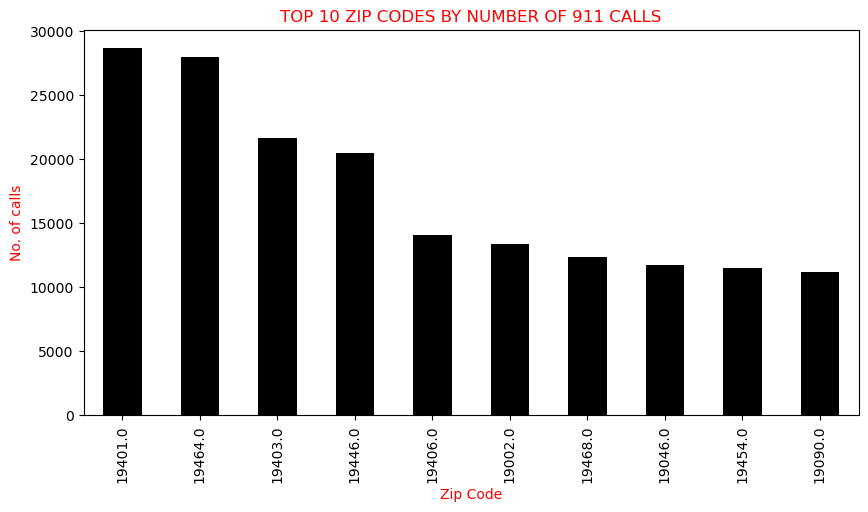

In [40]:
plt.figure(figsize=(10,5))
data.zip.value_counts().head(10).plot(kind="bar", color="black")
plt.xlabel("Zip Code", color= "Red")
plt.ylabel("No. of calls", color = "Red")
plt.title("TOP 10 ZIP CODES BY NUMBER OF 911 CALLS", color="Red")
plt.show()

##### Maximum no. of 911 calls have been registered from the area having the zip code 19401, followed by 19464 and 19403.

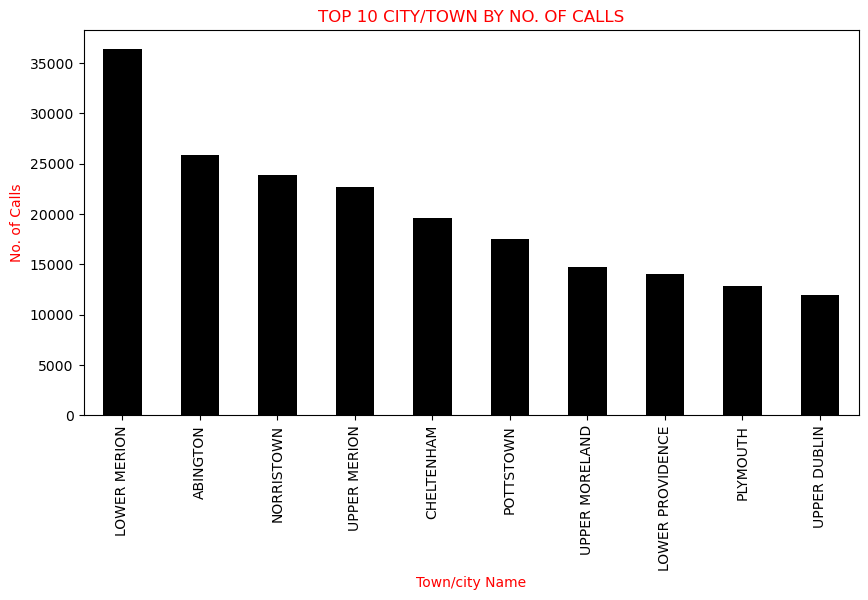

In [41]:
plt.figure(figsize=(10,5))
data.twp.value_counts().head(10).plot(kind="bar", color = "black")
plt.xlabel("Town/city Name", color = "red")
plt.ylabel("No. of Calls",color =  "Red")
plt.title("TOP 10 CITY/TOWN BY NO. OF CALLS", color = "Red")
plt.show()

##### Lower Merion have recorded the maximum no. of 911 calls, followed by Abington and Norristown at second and third position respectively. 

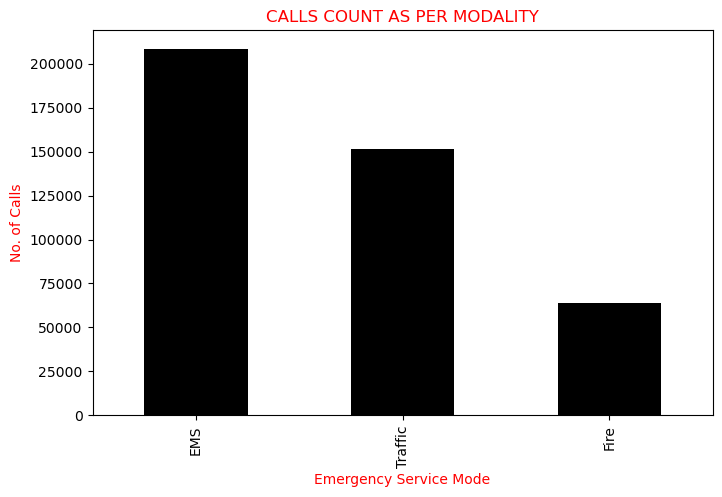

In [42]:
plt.figure(figsize=(8,5))
data.Modality.value_counts().plot(kind="bar", color = "black")
plt.xlabel("Emergency Service Mode", color = "red")
plt.ylabel("No. of Calls", color = "red")
plt.title("CALLS COUNT AS PER MODALITY", color = "Red")
plt.show()

##### Most of the 911 calls were "EMS" related.

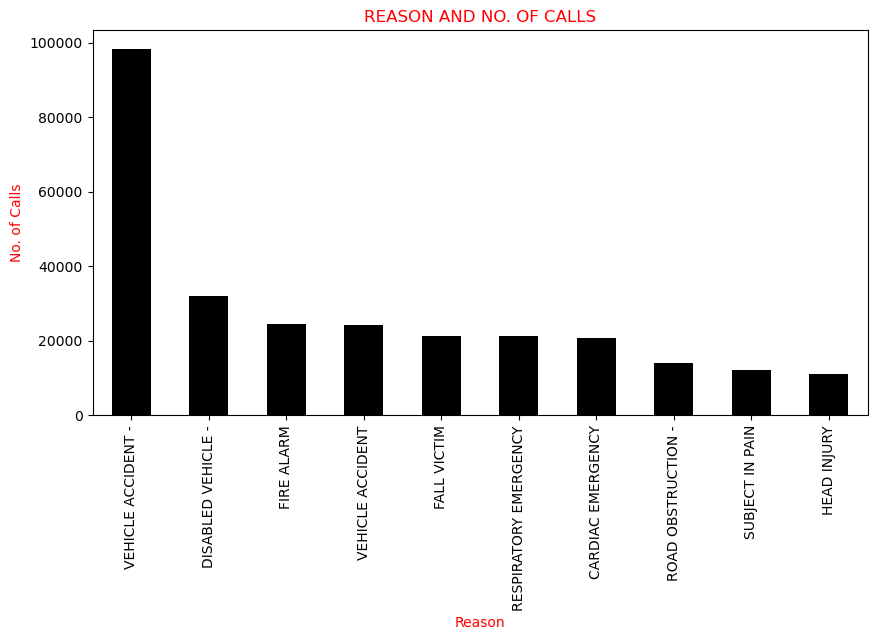

In [44]:
plt.figure(figsize=(10,5))
data["Accident Type"].value_counts().head(10).plot(kind="bar", color = "black")
plt.xlabel("Reason",color = "red")
plt.ylabel("No. of Calls",color = "red")
plt.title("REASON AND NO. OF CALLS",color = "red")
plt.show()

##### Reason behind maximum no. of 911 calls were "Vehicle Accident". After "vehicle accident" , "Disabled vehicle" and "fire alaram" were the main reason for 911 calls but counts were not even half the calls count of "vehicle accident" reason.

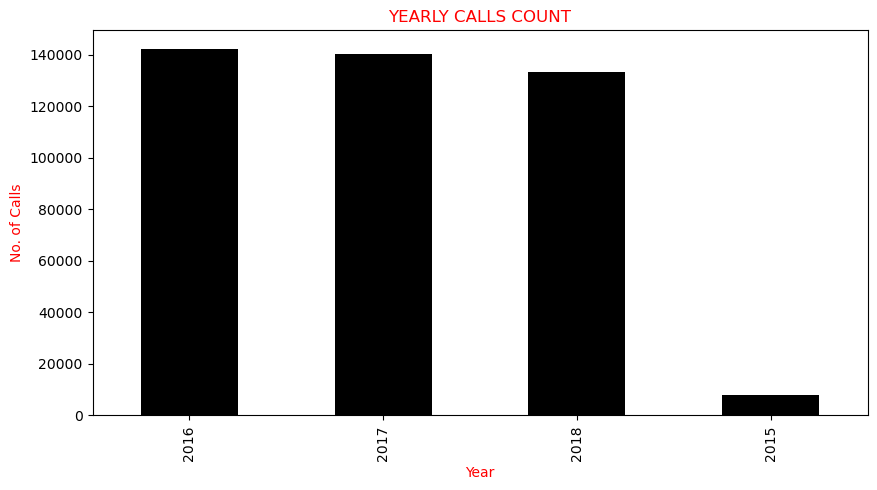

In [46]:
plt.figure(figsize=(10,5))
data.Year.value_counts().plot(kind="bar",color="black")
plt.xlabel("Year", color = "red")
plt.ylabel("No. of Calls", color = "red")
plt.title("YEARLY CALLS COUNT", color = "red")
plt.show()

#### 2015 has the least no. of 911 calls registered.

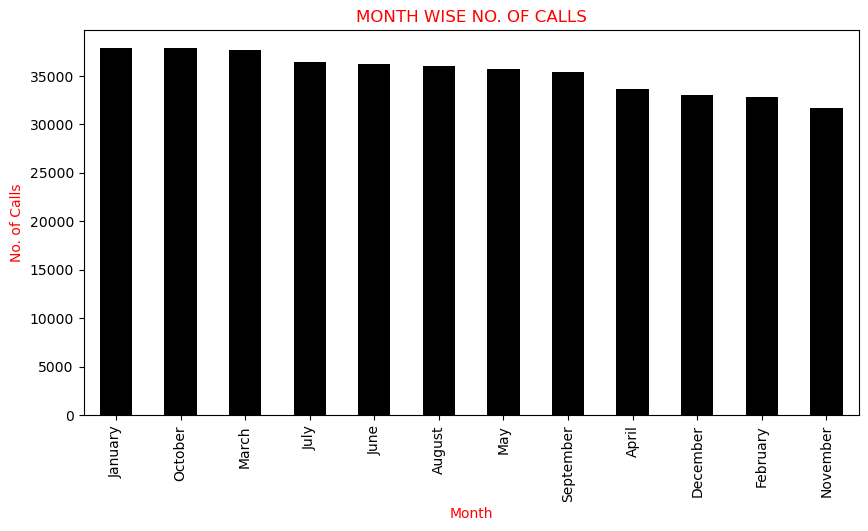

In [47]:
plt.figure(figsize=(10,5))
data.Month.value_counts().plot(kind="bar", color = "black")
plt.xlabel("Month", color = "red")
plt.ylabel("No. of Calls", color = "red")
plt.title("MONTH WISE NO. OF CALLS", color = "red")
plt.show()

##### In January maximum no. of calls registered and the least  calls were registered in month of November.

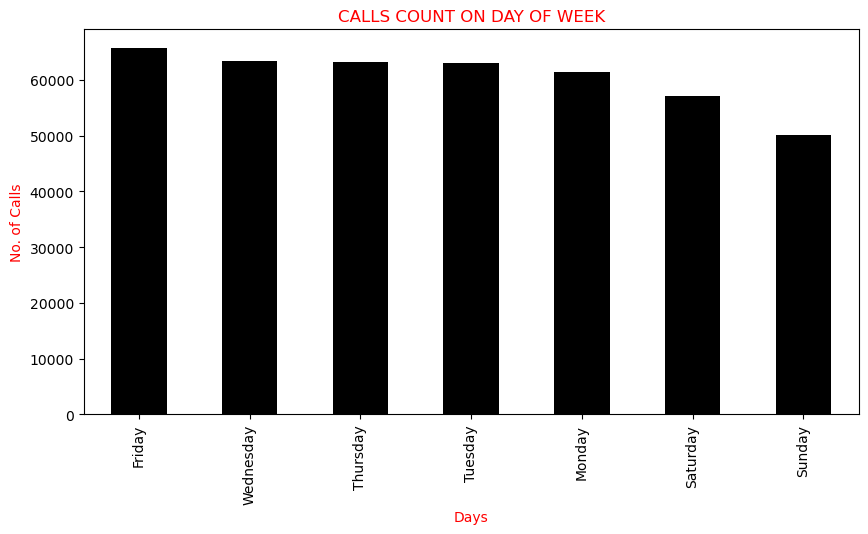

In [50]:
plt.figure(figsize=(10,5))
data["Day of Week"].value_counts().plot(kind="bar", color = "black")
plt.xlabel("Days", color = "red")
plt.ylabel("No. of Calls", color = "red")
plt.title("CALLS COUNT ON DAY OF WEEK", color = "red")
plt.show()

##### No. of  calls are maximum on friday and quite less on sundays.

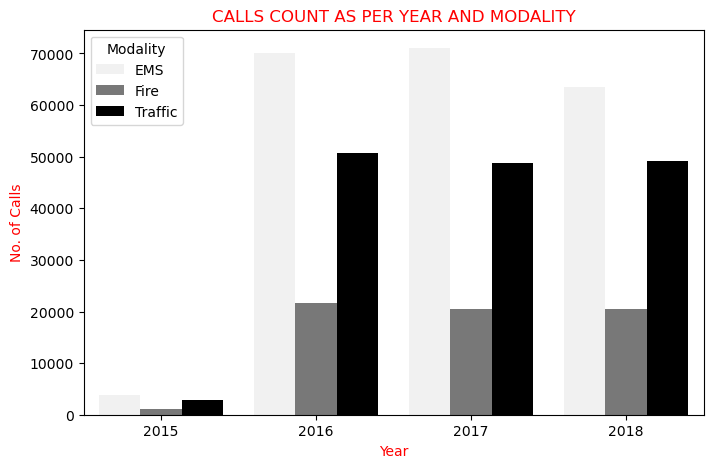

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x="Year",hue="Modality",data=data,color = "black")
plt.title("CALLS COUNT AS PER YEAR AND MODALITY", color = "red")
plt.xlabel("Year",color =  "red")
plt.ylabel("No. of Calls", color = "red")
plt.show()

##### In year 2015 calls for emergency services are very less as compaired to other years like 2016,2017 and 2018, and in those call, mostly calls are for EMS services.

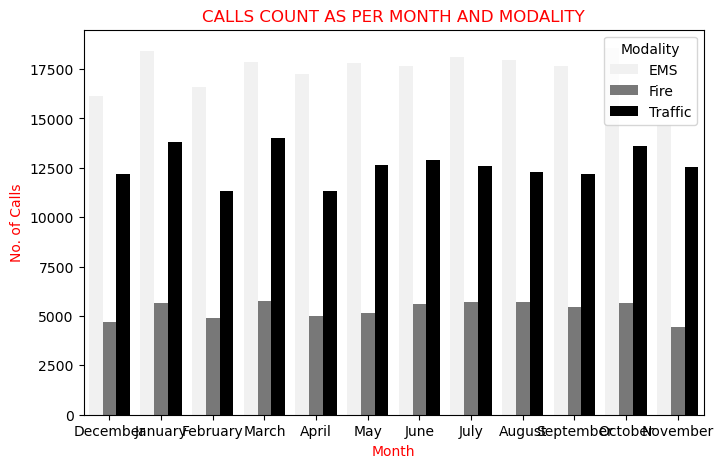

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x="Month",hue="Modality",data=data,color="black")
plt.title("CALLS COUNT AS PER MONTH AND MODALITY", color = "red")
plt.xlabel("Month",color =  "red")
plt.ylabel("No. of Calls", color = "red")
plt.show()

##### no. of calls acc. to month are pretty much equals but mostly calls are for EMS service.

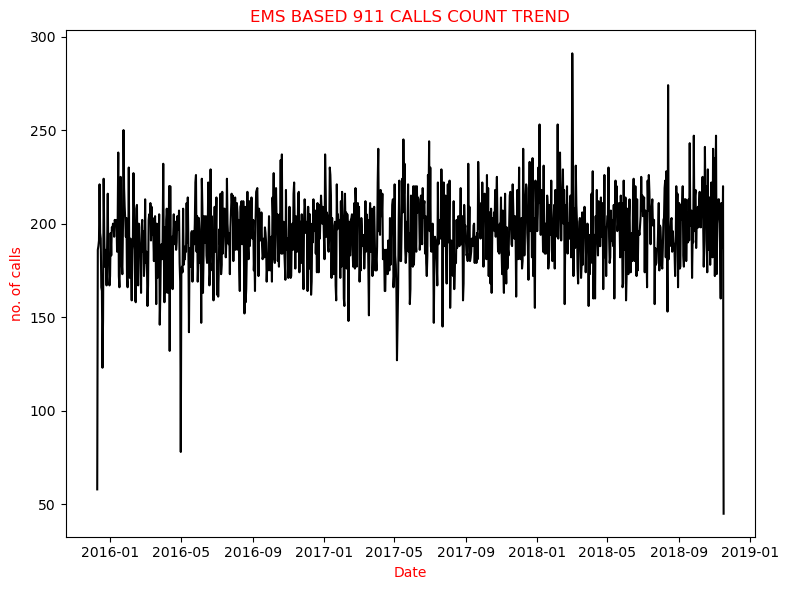

In [100]:
plt.figure(figsize=(8,6))
data[data['Modality']=='EMS'].groupby('Date').count()['lng'].plot(color = "black")
plt.title('EMS BASED 911 CALLS COUNT TREND', color="red")
plt.xlabel("Date", color= "red")
plt.ylabel("no. of calls" , color = "red")
plt.tight_layout()

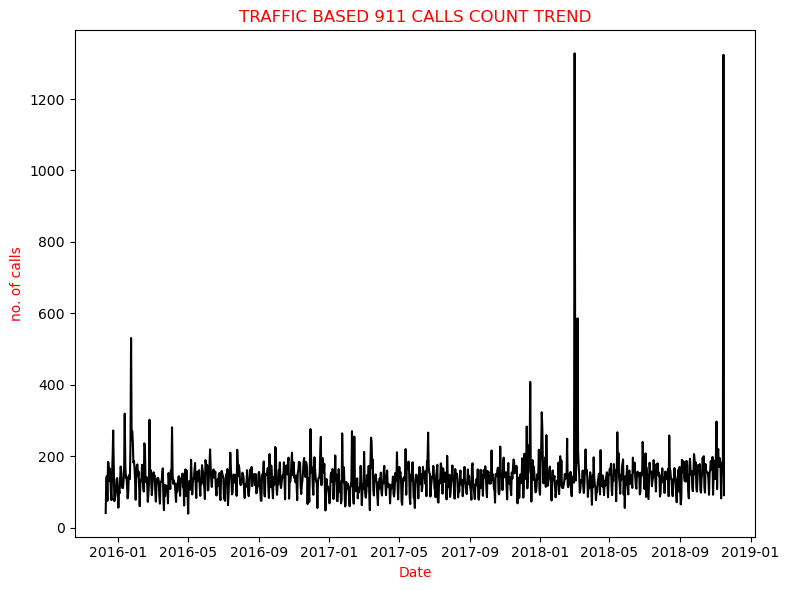

In [101]:
plt.figure(figsize=(8,6))
data[data['Modality']=='Traffic'].groupby('Date').count()['lng'].plot(color = "black")
plt.title('TRAFFIC BASED 911 CALLS COUNT TREND', color="red")
plt.xlabel("Date", color= "red")
plt.ylabel("no. of calls" , color = "red")
plt.tight_layout()

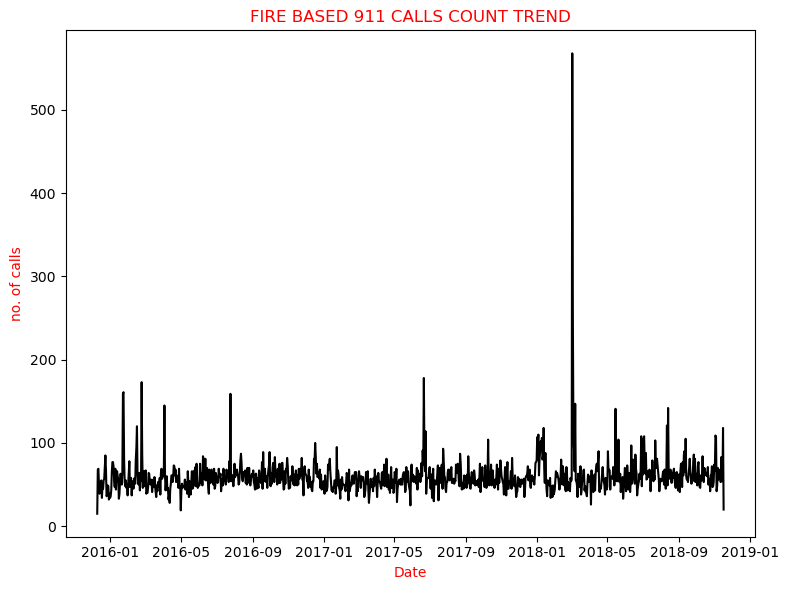

In [102]:
plt.figure(figsize=(8,6))
data[data['Modality']=='Fire'].groupby('Date').count()['lng'].plot(color = "black")
plt.title('FIRE BASED 911 CALLS COUNT TREND', color="red")
plt.xlabel("Date", color= "red")
plt.ylabel("no. of calls" , color = "red")
plt.tight_layout()

##### Calls for EMS services are more fluctuating and high in demand also, while calls for Traffic emergency is lower and as expected Calls for Fire is less. Observing the plot aroung the march of 2018 No of calls increased unexpectedly incresed and after that it follows previous pattern.

In [74]:
dm = data.groupby(by = ["Day of Week","Hour"]).count()["Modality"].unstack()
dm

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Monday,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Saturday,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sunday,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thursday,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tuesday,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wednesday,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


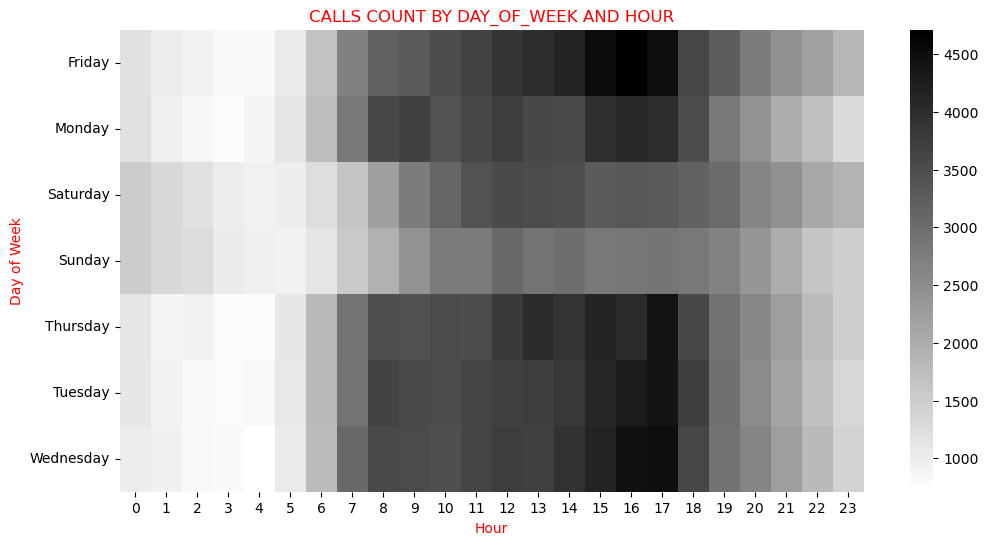

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(dm, cmap="gray_r")
plt.title("CALLS COUNT BY DAY_OF_WEEK AND HOUR", color="red")
plt.xlabel("Hour", color="red")
plt.ylabel("Day of Week", color= "red")
plt.show()

##### On sunday No. of calls are moderate. while other days around 8 to 18 hour no. of calls pretty much.

In [92]:
mh = data.groupby(by=['Month', 'Hour']).count()['Modality'].unstack()
mh

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
April,677,562,504,456,498,550,930,1427,1707,1795,...,2081,2199,2295,2153,1891,1530,1464,1193,1035,830
August,766,628,618,525,507,636,823,1419,1790,1860,...,2251,2346,2393,2274,1884,1666,1535,1315,1070,918
December,651,583,534,486,457,585,846,1271,1540,1715,...,1915,2157,2094,2460,2032,1571,1370,1179,1014,900
February,710,617,515,449,497,592,956,1525,1726,1772,...,1911,2013,1965,1952,1953,1639,1471,1207,1065,901
January,799,651,654,592,597,697,1163,1646,2155,2136,...,2182,2184,2150,2426,2212,1833,1536,1343,1133,942
July,747,698,599,566,531,639,841,1270,1703,1963,...,2287,2131,2388,2431,2113,1890,1605,1504,1171,896
June,705,613,550,483,415,643,897,1421,1758,1854,...,2217,2336,2594,2369,2028,1743,1517,1391,1137,985
March,743,645,621,498,477,621,948,1526,1901,2022,...,2480,2637,2614,2419,1999,1815,1628,1320,1093,900
May,726,578,576,509,497,545,932,1518,1829,1957,...,2151,2326,2392,2408,1927,1643,1576,1343,1108,849


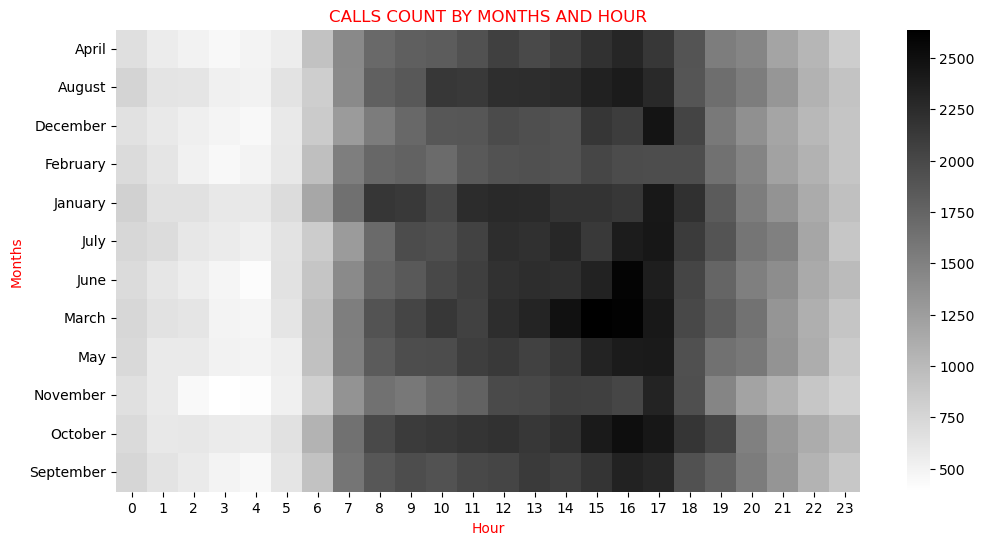

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(mh, cmap="gray_r")
plt.title("CALLS COUNT BY MONTHS AND HOUR", color="red")
plt.xlabel("Hour", color="red")
plt.ylabel("Months", color= "red")
plt.show()

##### In month of March, June around 15,16 hour, No of calls increased more. in range of hour 8 to hour 18 mostly calls are done on 911 services.

In [103]:
((data.title.value_counts(1))*100).head(4)

Traffic: VEHICLE ACCIDENT -    23.212765
Traffic: DISABLED VEHICLE -     7.518359
Fire: FIRE ALARM                5.751234
EMS: FALL VICTIM                5.013576
Name: title, dtype: float64

In [104]:
p=data.title.value_counts().head(10)

In [105]:
p

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
EMS: RESPIRATORY EMERGENCY     21158
EMS: CARDIAC EMERGENCY         20616
EMS: VEHICLE ACCIDENT          16928
Traffic: ROAD OBSTRUCTION -    14134
EMS: SUBJECT IN PAIN           12001
EMS: HEAD INJURY               11102
Name: title, dtype: int64

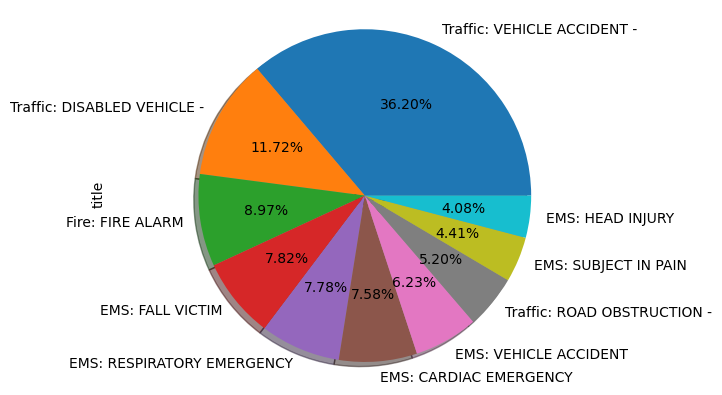

In [110]:
p.plot.pie(autopct="%1.2f%%",shadow=True)
plt.axis("equal")
plt.show()

##### Calls for Traffic Vehicle Accident are maximum. and service calls for Disable vehicle are at second. then Fire Alarm, and other calls for EMS are mostly used.

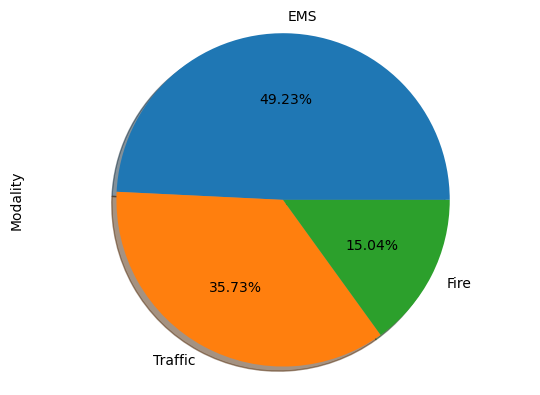

In [111]:
data.Modality.value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.axis('equal')
plt.show()

##### Max No of calls are for EMS.

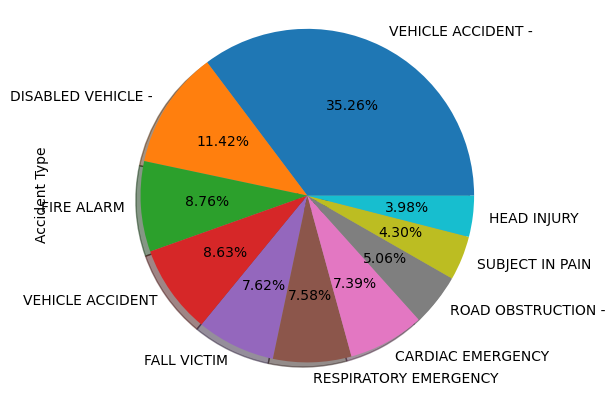

In [112]:
data["Accident Type"].value_counts().head(10).plot.pie(autopct='%1.2f%%',shadow=True)
plt.axis('equal')
plt.show()

##### calls for vehicle accident are maximum.